In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [2]:
def show_brand_timeline(df):
    """Показывает временные метки упоминаний брендов"""
    for _, row in df.iterrows(): #проходим по всем строкам dataframe
        if not row['brand_mentions']: #если нет упоминаний брендов, пропускаем
            continue
            
        print(f"\nВременные метки брендов в видео: {row['title']}") #выводим название видео
        for mention in sorted(row['brand_mentions'], key=lambda x: x['time']): #проходим по всем упоминаниям брендов
            mins, secs = divmod(int(mention['time']), 60) #переводим время в минуты и секунды
            print(f"{mins:02d}:{secs:02d} - {mention['brand']}: {mention['context']}") #выводим время, бренд и контекст упоминания

In [3]:
def visualize_brand_distribution(df):
    """Визуализация распределения брендов"""
    all_brands = []
    for brands in df['brands']:
        all_brands.extend(brands)
    
    if not all_brands:
        print("\nБренды не найдены ни в одном видео")
        return
    
    brand_counts = Counter(all_brands) #подсчитываем количество упоминаний каждого бренда
    top_brands = brand_counts.most_common(15) #берем топ 15 брендов по упоминаниям
    
    # Table
    print("\nТоп брендов по упоминаниям:")
    print(pd.DataFrame(top_brands, columns=['Бренд', 'Количество']).to_string(index=False))
    
    # Bar chart
    plt.figure(figsize=(12, 6))
    pd.Series(dict(top_brands)).plot(kind='barh', color='skyblue')
    plt.title('Топ 15 упоминаемых брендов', fontsize=14, color='black', fontfamily='Arial')
    plt.xlabel('Количество упоминаний', fontsize=12, color='black', fontfamily='Arial')
    plt.tight_layout()
    plt.show()
    
    # Word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(brand_counts)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Облако брендов')
    plt.show()

In [4]:
def visualize_channel_stats(df):
    """Визуализация статистики по каналам"""
    if len(df['channel'].unique()) > 1: #если в dataframe больше одного канала
        channel_stats = df.groupby('channel')['brand_count'].sum().sort_values(ascending=False) #группируем по каналам и суммируем количество упоминаний брендов
        
        plt.figure(figsize=(12, 6))
        channel_stats.plot(kind='bar', color='salmon')
        plt.title('Общее количество упоминаний брендов по каналам', fontsize=14, color='black', fontfamily='Arial')
        plt.ylabel('Количество брендов', fontsize=12, color='black', fontfamily='Arial')
        plt.xticks(rotation=45, fontsize=10, color='black', fontfamily='Arial')
        plt.tight_layout()
        plt.show()

        ad_pattern_stats = df.groupby('channel')['is_ad_pattern'].mean().sort_values(ascending=False) #группируем по каналам и считаем долю видео с рекламными паттернами
        
        plt.figure(figsize=(12, 6))
        ad_pattern_stats.plot(kind='bar', color='lightgreen')
        plt.title('Доля видео с рекламными паттернами по каналам', fontsize=14, color='black', fontfamily='Arial')
        plt.ylabel('Доля видео с рекламными паттернами', fontsize=12, color='black', fontfamily='Arial')
        plt.xticks(rotation=45, fontsize=10, color='black', fontfamily='Arial')
        plt.tight_layout()
        plt.show()
        
        # Выводим статистику
        print("\nСтатистика рекламных паттернов по каналам:")
        for channel in ad_pattern_stats.index:
            total_videos = len(df[df['channel'] == channel]) #количество видео в канале
            ads_videos = df[df['channel'] == channel]['is_ad_pattern'].sum() #количество видео с рекламными паттернами в канале
            print(f"{channel}: {ads_videos}/{total_videos} видео с рекламными паттернами ({ad_pattern_stats[channel]*100:.1f}%)") #выводим статистику

In [5]:
def save_detailed_results(df, filename='brand_analysis_detailed.xlsx'):
    """Сохранение детальных результатов в Excel"""
    with pd.ExcelWriter(filename) as writer: #создаем writer для записи в excel
        overview_data = [] #создаем список для данных обзора
        for _, row in df.iterrows(): #проходим по всем строкам dataframe
            overview_data.append({
                'Канал': row['channel'],
                'Название': row['title'],
                'Найдено брендов': row['brand_count']
            })
        pd.DataFrame(overview_data).to_excel(writer, sheet_name='Обзор', index=False) #сохраняем данные обзора в excel
        
        all_mentions = [] #создаем список для данных упоминаний
        for _, row in df.iterrows(): #проходим по всем строкам dataframe
            for m in row['brand_mentions']:
                mins, secs = divmod(int(m['time']), 60) #переводим время в минуты и секунды
                all_mentions.append({
                    'Канал': row['channel'],
                    'Видео': row['title'],
                    'Бренд': m['brand'],
                    'Время': f"{mins:02d}:{secs:02d}",
                    'Контекст': m['context']
                })
        pd.DataFrame(all_mentions).to_excel(writer, sheet_name='Упоминания', index=False) #сохраняем данные упоминаний в excel


Временные метки брендов в видео: Охота На Звезд 2 ! Литвин и Равшан vs Сэм и Егорик !
12:51 - Majestic RP: зайти на любой серверов maes потому что...
13:13 - Majestic RP: поверь это не главная фишка маджестика...
76:04 - LitEnergy: чего Ладно я делаю глоток L Energy И...

Временные метки брендов в видео: Кто Последний Уснёт Забирает 1 000 000 !
12:09 - Majestic RP: Добро пожаловать на magestic RP...
12:50 - Majestic RP: Majestic RP Будьте готовы равшик...
12:56 - LitEnergy: баночку Lit Energy пока ты её держишь...
39:16 - Алиса: Алиса записала Алиса есть у тебя Ну чаме...

Временные метки брендов в видео: Украли Машину за 10 Миллионов ! Наказали Вора !!
01:20 - LitEnergy: именно За регистрацию банок L Energy в...
10:02 - Сбер: были встретиться у Сбербанка зачем вы...
10:04 - Сбер: хотели Сбербанк найти посчитать деньги...
11:10 - Сбер: быстрее Ну всё произошло в Сбербанке...
13:12 - Сбер: около сбера зайти внутрь сделать...
14:07 - Majestic RP: пользователей недавно на magestic RP...


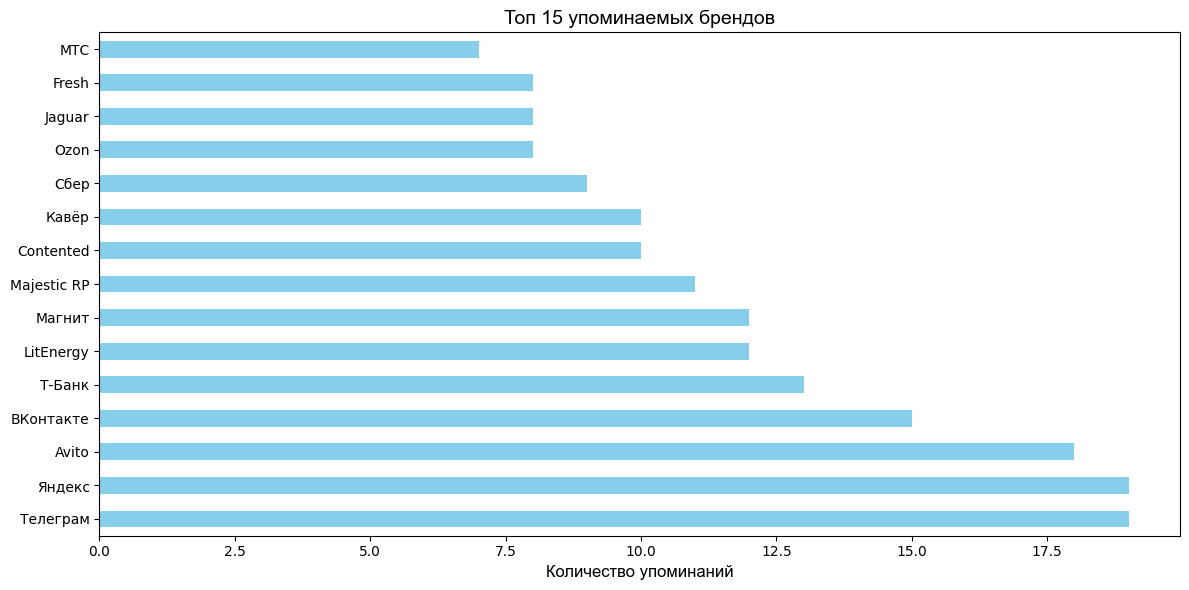

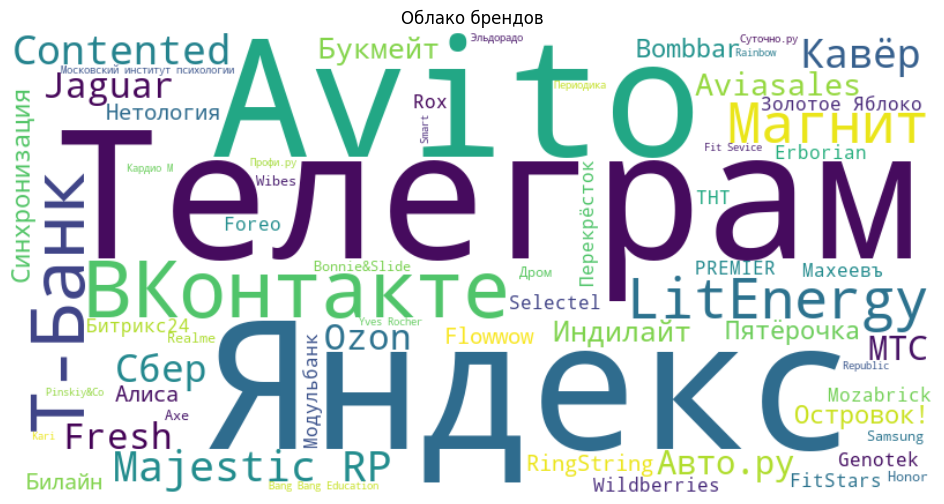

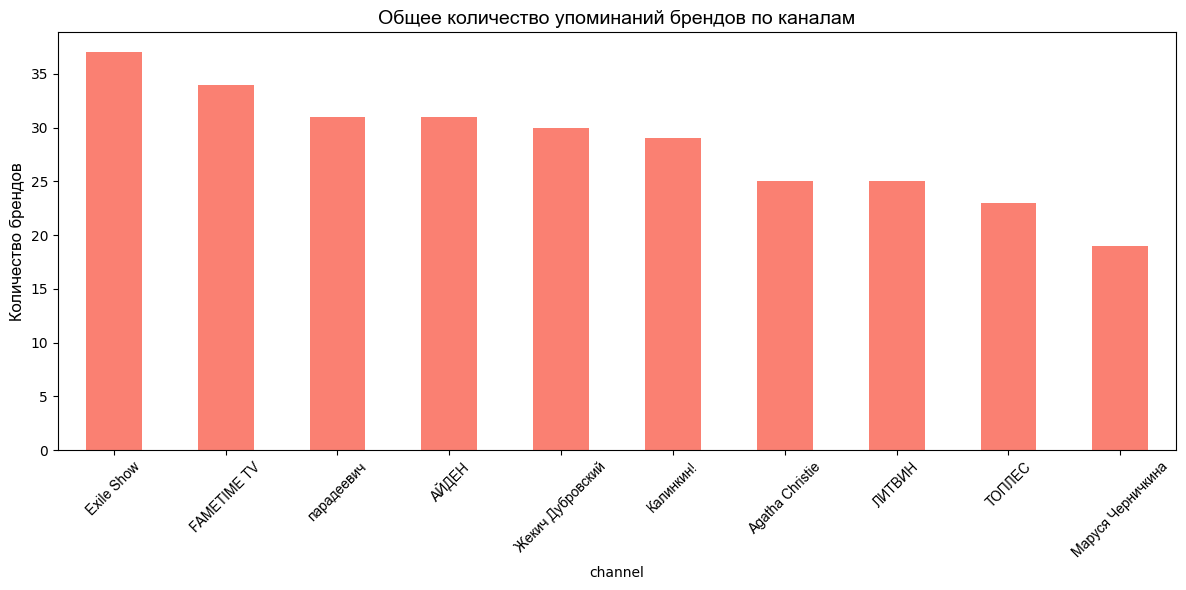

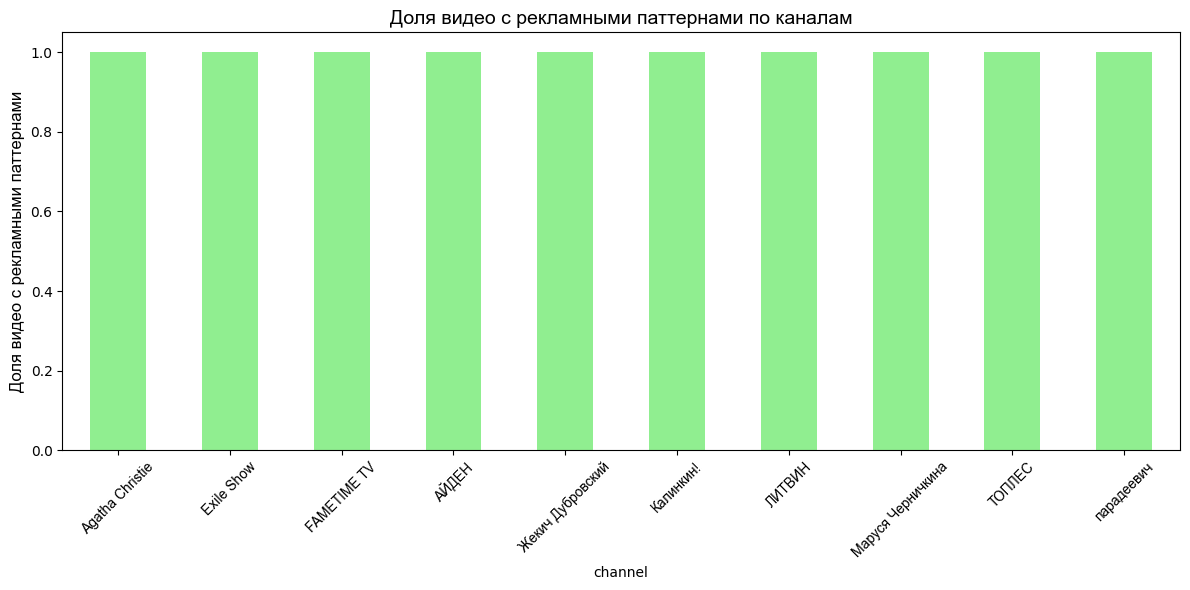


Статистика рекламных паттернов по каналам:
Agatha Christie: 10/10 видео с рекламными паттернами (100.0%)
Exile Show: 10/10 видео с рекламными паттернами (100.0%)
FAMETIME TV: 10/10 видео с рекламными паттернами (100.0%)
АЙДЕН: 10/10 видео с рекламными паттернами (100.0%)
Жекич Дубровский: 10/10 видео с рекламными паттернами (100.0%)
Калинкин!: 10/10 видео с рекламными паттернами (100.0%)
ЛИТВИН: 10/10 видео с рекламными паттернами (100.0%)
Маруся Черничкина: 10/10 видео с рекламными паттернами (100.0%)
ТОПЛЕС: 10/10 видео с рекламными паттернами (100.0%)
парадеевич: 10/10 видео с рекламными паттернами (100.0%)

Анализ завершен. Результаты сохранены в brand_analysis_detailed.xlsx


In [6]:
if __name__ == "__main__":
    results_df = pd.read_csv('brand_analysis_with_detection.csv') #загружаем данные из csv файла
    
    results_df['brands'] = results_df['brands'].apply(eval) #преобразуем строку с брендами обратно в список
    results_df['brand_mentions'] = results_df['brand_mentions'].apply(eval) #преобразуем строку с упоминаниями брендов обратно в список
    
    show_brand_timeline(results_df)
    visualize_brand_distribution(results_df)
    visualize_channel_stats(results_df)
    
    save_detailed_results(results_df)
    print("\nАнализ завершен. Результаты сохранены в brand_analysis_detailed.xlsx")